# 🦜🔗 LangChain: Seu Kit de Ferramentas para Dominar IAs - Módulo 1

**Por: Pedro Nunes Guth**

Bora começar nossa jornada no mundo do LangChain! Neste módulo vamos entender o que é essa biblioteca que tá bombando no mundo da IA e por que ela vai facilitar MUITO sua vida ao trabalhar com modelos de linguagem.

![](https://s3.us-east-1.amazonaws.com/turing.education/books/imagens/langchain-modulo-01_img_01.png)

## 🤔 Tá, mas o que é LangChain afinal?

Imagina que você quer fazer um bolo. Você tem os ingredientes (dados), o forno (modelo de IA), mas precisa de uma receita e utensílios para misturar tudo certinho. O **LangChain** é exatamente isso: um kit completo de ferramentas para "cozinhar" aplicações incríveis com IA!

O LangChain é um **framework** (conjunto organizado de ferramentas) que facilita a criação de aplicações usando **Large Language Models (LLMs)** como GPT, Gemini, Claude e outros.

### Por que ele existe?

Sem o LangChain, trabalhar com IAs é como tentar montar um móvel sem manual:
- Você tem que escrever muito código repetitivo
- Conectar diferentes serviços vira uma dor de cabeça
- Gerenciar memória e contexto é complexo
- Cada modelo tem sua própria API diferente

**Dica!** Pense no LangChain como o "WordPress da IA" - ele padroniza e simplifica tudo!

In [1]:
# Vamos começar instalando o LangChain
# Execute esta célula para instalar as dependências necessárias

# ============================================================
# VERSÃO 0.3 (código antigo - mantido como referência):
# !pip install langchain langchain-google-genai python-dotenv matplotlib
# ============================================================

# VERSÃO 1.0 (código atual):
!pip install "langchain>=1.0" langchain-google-genai python-dotenv matplotlib

print("✅ LangChain instalado com sucesso!")
print("🎉 Estamos prontos para começar nossa jornada!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.4 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


✅ LangChain instalado com sucesso!
🎉 Estamos prontos para começar nossa jornada!


In [2]:
# Vamos importar as bibliotecas principais que vamos usar no curso
import langchain
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

print(f"📦 Versão do LangChain: {langchain.__version__}")
print(f"📅 Data de início do curso: {datetime.now().strftime('%d/%m/%Y %H:%M')}")
print("🚀 Tudo certo para decolar!")

📦 Versão do LangChain: 0.3.27
📅 Data de início do curso: 14/09/2025 13:30
🚀 Tudo certo para decolar!


## 🧩 Os Componentes Principais do LangChain

O LangChain é como uma caixa de ferramentas organizada. Cada "gaveta" tem um propósito específico:

### 1. **Models** 🤖
- Interface unificada para diferentes IAs (GPT, Gemini, Claude, etc.)
- ChatModels para conversas
- LLMs para completar textos

### 2. **Prompts** 📝
- Templates reutilizáveis
- Formatação automática
- Prompts dinâmicos

### 3. **Chains** ⛓️
- Sequências de operações
- Workflows automatizados
- Processamento em etapas

### 4. **Memory** 🧠
- Lembrança de conversas
- Contexto persistente
- Diferentes tipos de memória

### 5. **Agents** 🕵️
- IAs que tomam decisões
- Uso de ferramentas externas
- Raciocínio complexo

/tmp/ipython-input-2679501582.py:49: UserWarning: Glyph 129436 (\N{PARROT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2679501582.py:49: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129436 (\N{PARROT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


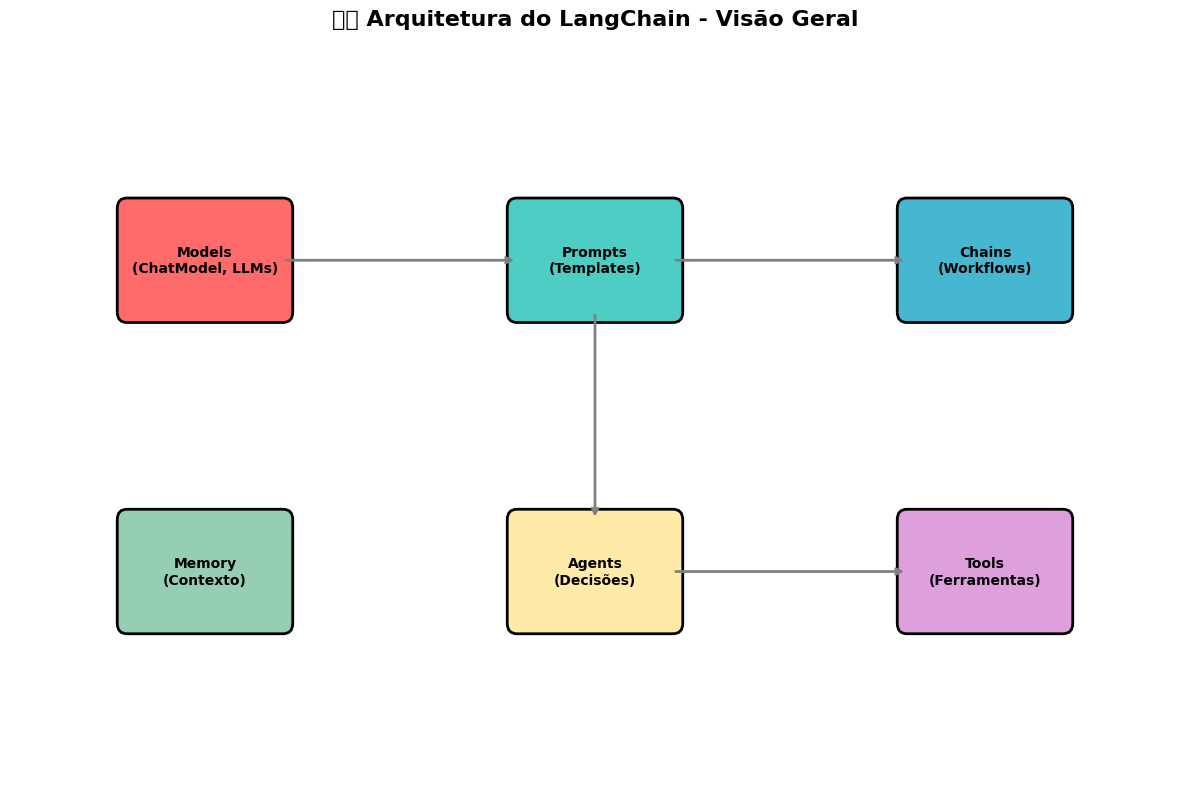

📊 Liiindo! Essa é a estrutura básica que vamos dominar no curso!


In [3]:
# Vamos visualizar a arquitetura do LangChain de forma simples
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Criando um diagrama simples da arquitetura
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Definindo as caixas dos componentes
componentes = [
    {'nome': 'Models\n(ChatModel, LLMs)', 'pos': (2, 6), 'cor': '#FF6B6B'},
    {'nome': 'Prompts\n(Templates)', 'pos': (6, 6), 'cor': '#4ECDC4'},
    {'nome': 'Chains\n(Workflows)', 'pos': (10, 6), 'cor': '#45B7D1'},
    {'nome': 'Memory\n(Contexto)', 'pos': (2, 3), 'cor': '#96CEB4'},
    {'nome': 'Agents\n(Decisões)', 'pos': (6, 3), 'cor': '#FFEAA7'},
    {'nome': 'Tools\n(Ferramentas)', 'pos': (10, 3), 'cor': '#DDA0DD'}
]

# Desenhando os componentes
for comp in componentes:
    rect = patches.FancyBboxPatch(
        (comp['pos'][0]-0.8, comp['pos'][1]-0.5), 1.6, 1,
        boxstyle="round,pad=0.1",
        facecolor=comp['cor'],
        edgecolor='black',
        linewidth=2
    )
    ax.add_patch(rect)
    ax.text(comp['pos'][0], comp['pos'][1], comp['nome'],
           ha='center', va='center', fontsize=10, weight='bold')

# Desenhando setas de conexão
setas = [
    ((2.8, 6), (5.2, 6)),  # Models -> Prompts
    ((6.8, 6), (9.2, 6)),  # Prompts -> Chains
    ((6, 5.5), (6, 3.5)),  # Prompts -> Agents
    ((6.8, 3), (9.2, 3))   # Agents -> Tools
]

for seta in setas:
    ax.annotate('', xy=seta[1], xytext=seta[0],
                arrowprops=dict(arrowstyle='->', lw=2, color='gray'))

ax.set_xlim(0, 12)
ax.set_ylim(1, 8)
ax.set_title('🦜🔗 Arquitetura do LangChain - Visão Geral',
             fontsize=16, weight='bold', pad=20)
ax.axis('off')

plt.tight_layout()
plt.show()

print("📊 Liiindo! Essa é a estrutura básica que vamos dominar no curso!")

## 🎯 Por que o LangChain Ajuda MUITO?

Vou te contar uma história real. Antes do LangChain, para fazer um chatbot simples que lembrava da conversa, você precisava de:

```python
# Código SEM LangChain (complexo e verboso)
import openai
import json

class ChatbotComplexo:
    def __init__(self):
        self.historia = []
        self.client = openai.OpenAI()
    
    def processar_mensagem(self, mensagem):
        self.historia.append({"role": "user", "content": mensagem})
        
        response = self.client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=self.historia,
            max_tokens=150
        )
        
        resposta = response.choices[0].message.content
        self.historia.append({"role": "assistant", "content": resposta})
        
        # Gerenciar limite de tokens manualmente
        if len(str(self.historia)) > 3000:
            self.historia = self.historia[-10:]  # Manter só últimas 10
        
        return resposta
```

### Com LangChain fica assim:

```python
# ============================================================
# VERSÃO 0.3 (código antigo - mantido como referência):
# from langchain_google_genai import ChatGoogleGenerativeAI
# from langchain.memory import ConversationBufferWindowMemory
# from langchain.chains import ConversationChain
#
# llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
# memory = ConversationBufferWindowMemory(k=10)
# conversation = ConversationChain(llm=llm, memory=memory)
# resposta = conversation.predict(input="Oi, como você está?")
# ============================================================

# VERSÃO 1.0 (código atual - simples e elegante):
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.messages import HumanMessage, AIMessage

# Inicializa o modelo
model = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

# Histórico de mensagens (memória manual ou use create_agent para casos avançados)
historico = []

# Conversar é simples!
historico.append(HumanMessage("Oi, como você está?"))
resposta = model.invoke(historico)
historico.append(resposta)

print(resposta.content)
```

> **Nota v1.0**: Na versão 1.0, `ConversationChain` e `ConversationBufferWindowMemory` foram movidos para o pacote `langchain-classic`. A nova abordagem recomendada é usar `create_agent` com checkpointer para memória persistente, ou gerenciar o histórico de mensagens manualmente como mostrado acima.

**Diferença gritante, né?** 🤯

/tmp/ipython-input-2810621666.py:40: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


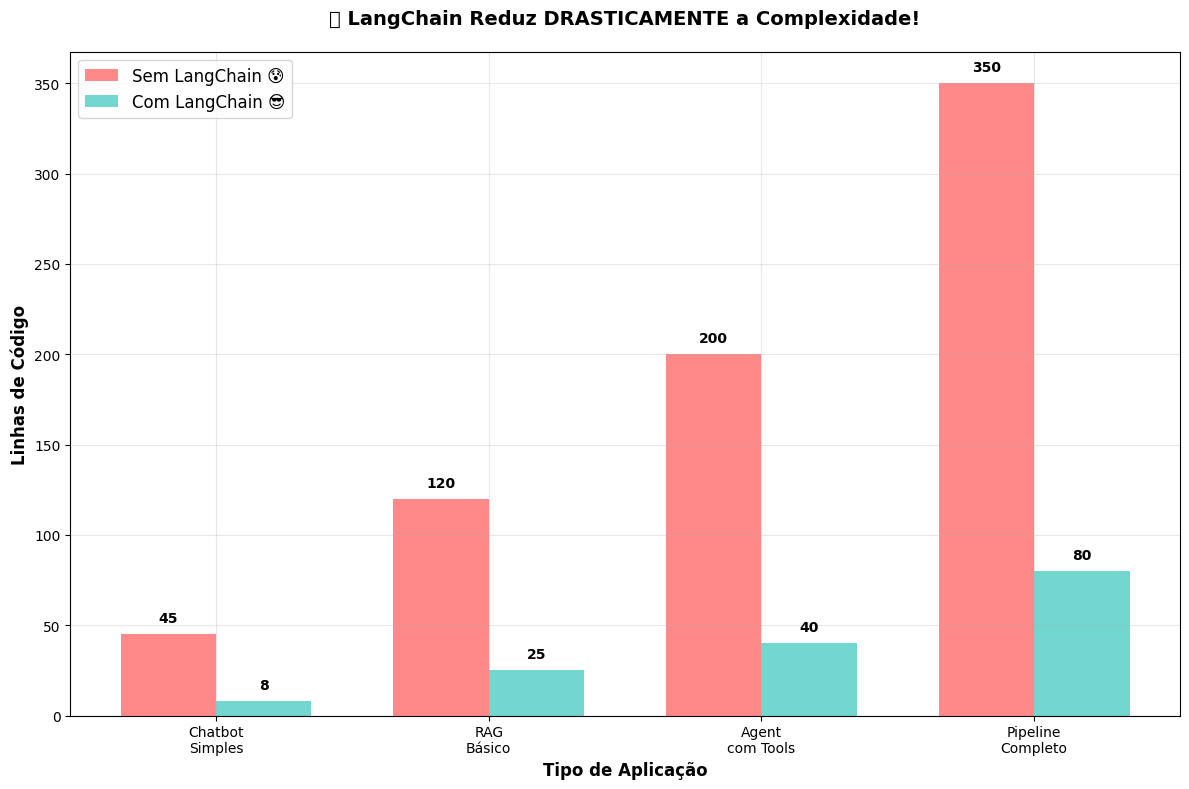

📊 Em média, o LangChain reduz o código em 79.6%!
🎯 Menos código = Menos bugs = Mais produtividade!


In [4]:
# Vamos comparar a complexidade com e sem LangChain
import matplotlib.pyplot as plt

# Dados para comparação
tarefas = ['Chatbot\nSimples', 'RAG\nBásico', 'Agent\ncom Tools', 'Pipeline\nCompleto']
linhas_sem_langchain = [45, 120, 200, 350]
linhas_com_langchain = [8, 25, 40, 80]

x = np.arange(len(tarefas))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))

# Criando as barras
bars1 = ax.bar(x - width/2, linhas_sem_langchain, width,
               label='Sem LangChain 😰', color='#FF6B6B', alpha=0.8)
bars2 = ax.bar(x + width/2, linhas_com_langchain, width,
               label='Com LangChain 😎', color='#4ECDC4', alpha=0.8)

# Adicionando valores nas barras
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax.set_xlabel('Tipo de Aplicação', fontsize=12, fontweight='bold')
ax.set_ylabel('Linhas de Código', fontsize=12, fontweight='bold')
ax.set_title('🚀 LangChain Reduz DRASTICAMENTE a Complexidade!',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(tarefas)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculando a redução média
reducao_media = np.mean([1 - (com/sem) for sem, com in zip(linhas_sem_langchain, linhas_com_langchain)])
print(f"📊 Em média, o LangChain reduz o código em {reducao_media:.1%}!")
print("🎯 Menos código = Menos bugs = Mais produtividade!")

## 🗺️ Nossa Jornada no Curso: O que Vamos Aprender

Este curso é estruturado como uma trilha progressiva. Cada módulo constrói sobre o anterior, e no final você vai ter o conhecimento completo para criar aplicações incríveis!

> **Nota**: Este curso foi atualizado para **LangChain v1.0** (versão estável). Onde aplicável, mantemos o código da versão 0.3 comentado como referência.

### 🏗️ **Fundação (Módulos 2-5)**
- **ChatModel**: Conectar e usar diferentes IAs
- **Runnables e LCEL**: A nova forma de conectar componentes
- **Prompt Templates**: Criar prompts dinâmicos e reutilizáveis
- **OutputParsers**: Estruturar as respostas da IA

### 🔧 **Ferramentas Avançadas (Módulos 6-7)**
- **Chains**: Workflows complexos
- **Memory Systems**: Dar memória às suas IAs

### 📚 **RAG - Retrieval Augmented Generation (Módulos 8-10)**
- **Document Loading**: Carregar seus próprios dados
- **Vector Stores**: Busca semântica inteligente
- **RAG Implementation**: IA que "lê" seus documentos

### 🤖 **Inteligência Avançada (Módulo 11)**
- **Agents e Tools**: IA que toma decisões e usa ferramentas

### 🚀 **Projetos e Deploy (Módulos 12-14)**
- **Projetos Práticos**: Aplicações reais
- **Deploy com Streamlit**: Colocar no ar!

### 🔄 **Futuro e Evolução (Módulos 15-17)**
- **Novidades do LangChain v1.0**: O que mudou e como aproveitar
- **LangGraph**: Workflows ainda mais complexos
- **LangSmith**: Monitoramento e debug

/tmp/ipython-input-1674258312.py:102: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1674258312.py:102: UserWarning: Glyph 128072 (\N{WHITE LEFT POINTING BACKHAND INDEX}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128072 (\N{WHITE LEFT POINTING BACKHAND INDEX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


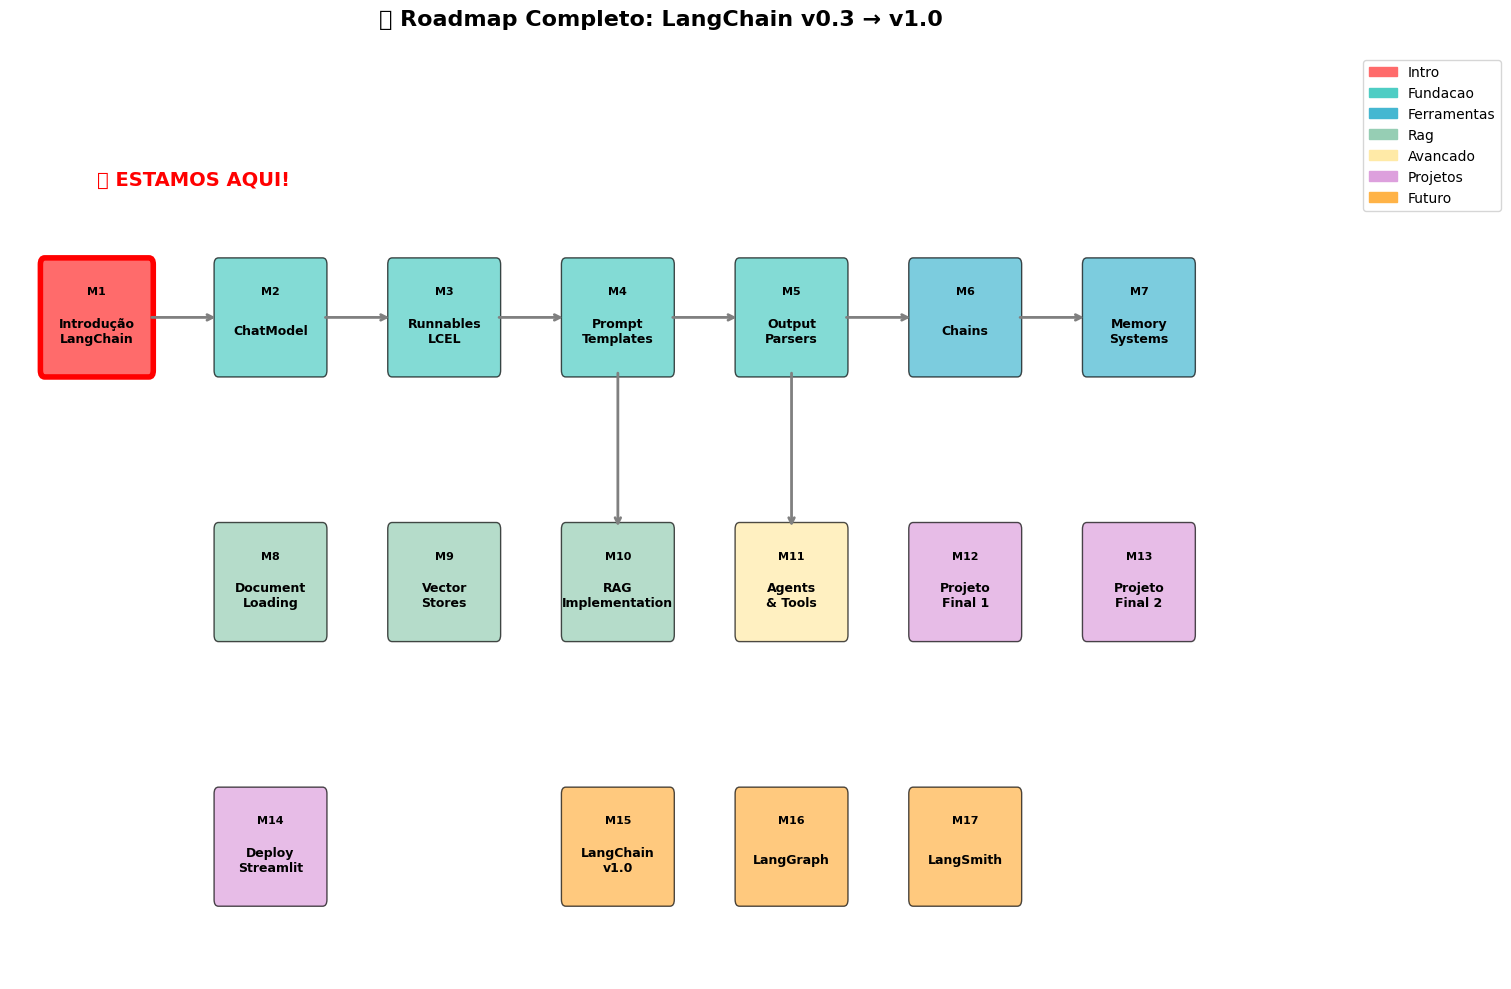

🎯 Essa é nossa jornada completa!
📈 Do básico ao avançado, sempre com projetos práticos!


In [5]:
# Vamos criar um roadmap visual do nosso curso
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(15, 10))

# Definindo os módulos e suas categorias
modulos = [
    {'nome': 'Introdução\nLangChain', 'pos': (1, 8), 'categoria': 'intro'},
    {'nome': 'ChatModel', 'pos': (3, 8), 'categoria': 'fundacao'},
    {'nome': 'Runnables\nLCEL', 'pos': (5, 8), 'categoria': 'fundacao'},
    {'nome': 'Prompt\nTemplates', 'pos': (7, 8), 'categoria': 'fundacao'},
    {'nome': 'Output\nParsers', 'pos': (9, 8), 'categoria': 'fundacao'},
    {'nome': 'Chains', 'pos': (11, 8), 'categoria': 'ferramentas'},
    {'nome': 'Memory\nSystems', 'pos': (13, 8), 'categoria': 'ferramentas'},
    {'nome': 'Document\nLoading', 'pos': (3, 6), 'categoria': 'rag'},
    {'nome': 'Vector\nStores', 'pos': (5, 6), 'categoria': 'rag'},
    {'nome': 'RAG\nImplementation', 'pos': (7, 6), 'categoria': 'rag'},
    {'nome': 'Agents\n& Tools', 'pos': (9, 6), 'categoria': 'avancado'},
    {'nome': 'Projeto\nFinal 1', 'pos': (11, 6), 'categoria': 'projetos'},
    {'nome': 'Projeto\nFinal 2', 'pos': (13, 6), 'categoria': 'projetos'},
    {'nome': 'Deploy\nStreamlit', 'pos': (3, 4), 'categoria': 'projetos'},
    {'nome': 'Novidades\nv1.0', 'pos': (7, 4), 'categoria': 'futuro'},
    {'nome': 'LangGraph', 'pos': (9, 4), 'categoria': 'futuro'},
    {'nome': 'LangSmith', 'pos': (11, 4), 'categoria': 'futuro'}
]

# Cores para cada categoria
cores = {
    'intro': '#FF6B6B',
    'fundacao': '#4ECDC4',
    'ferramentas': '#45B7D1',
    'rag': '#96CEB4',
    'avancado': '#FFEAA7',
    'projetos': '#DDA0DD',
    'futuro': '#FFB347'
}

# Desenhando os módulos
for i, mod in enumerate(modulos):
    # Destacar o módulo atual (primeiro)
    if i == 0:
        rect = mpatches.FancyBboxPatch(
            (mod['pos'][0]-0.6, mod['pos'][1]-0.4), 1.2, 0.8,
            boxstyle="round,pad=0.05",
            facecolor=cores[mod['categoria']],
            edgecolor='red',
            linewidth=4
        )
    else:
        rect = mpatches.FancyBboxPatch(
            (mod['pos'][0]-0.6, mod['pos'][1]-0.4), 1.2, 0.8,
            boxstyle="round,pad=0.05",
            facecolor=cores[mod['categoria']],
            edgecolor='black',
            linewidth=1,
            alpha=0.7
        )

    ax.add_patch(rect)

    # Número do módulo
    ax.text(mod['pos'][0], mod['pos'][1]+0.2, f'M{i+1}',
           ha='center', va='center', fontsize=8, weight='bold')

    # Nome do módulo
    ax.text(mod['pos'][0], mod['pos'][1]-0.1, mod['nome'],
           ha='center', va='center', fontsize=9, weight='bold')

# Adicionando setas de fluxo
setas_principais = [
    ((1.6, 8), (2.4, 8)),   # 1->2
    ((3.6, 8), (4.4, 8)),   # 2->3
    ((5.6, 8), (6.4, 8)),   # 3->4
    ((7.6, 8), (8.4, 8)),   # 4->5
    ((9.6, 8), (10.4, 8)),  # 5->6
    ((11.6, 8), (12.4, 8)), # 6->7
    ((7, 7.6), (7, 6.4)),   # Para RAG
    ((9, 7.6), (9, 6.4)),   # Para Agents
]

for seta in setas_principais:
    ax.annotate('', xy=seta[1], xytext=seta[0],
                arrowprops=dict(arrowstyle='->', lw=2, color='gray'))

# Legenda das categorias
legendas = []
for cat, cor in cores.items():
    legendas.append(mpatches.Patch(color=cor, label=cat.title()))

ax.legend(handles=legendas, loc='upper right', bbox_to_anchor=(1.15, 1))

# Adicionando indicador do módulo atual
ax.text(1, 9, '👈 ESTAMOS AQUI!', fontsize=14, weight='bold', color='red')

ax.set_xlim(0, 15)
ax.set_ylim(3, 10)
ax.set_title('🗺️ Roadmap Completo: Curso LangChain v1.0',
             fontsize=16, weight='bold', pad=20)
ax.axis('off')

plt.tight_layout()
plt.show()

print("🎯 Essa é nossa jornada completa!")
print("📈 Do básico ao avançado, sempre com projetos práticos!")

## 🔥 LangChain vs Outros Frameworks

"Tá Pedro, mas por que LangChain e não outras opções?"

Ótima pergunta! Vamos comparar:

| Framework | Prós | Contras | Nota |
|-----------|------|---------|------|
| **LangChain** | 🟢 Mais completo<br/>🟢 Maior comunidade<br/>🟢 Muitos integrações | 🔴 Pode ser verboso<br/>🔴 Curva de aprendizado | ⭐⭐⭐⭐⭐ |
| **LlamaIndex** | 🟢 Focado em dados<br/>🟢 RAG excelente | 🔴 Menos versátil<br/>🔴 Menor ecossistema | ⭐⭐⭐⭐ |
| **Haystack** | 🟢 Produção ready<br/>🟢 Performance | 🔴 Complexo setup<br/>🔴 Menos flexível | ⭐⭐⭐ |
| **Código Puro** | 🟢 Controle total<br/>🟢 Performance max | 🔴 Muito trabalho<br/>🔴 Reinventar a roda | ⭐⭐ |

### Por que escolhemos LangChain?

1. **Versatilidade**: Faz de tudo - desde chatbots até agents complexos
2. **Comunidade**: +70k stars no GitHub, documentação excelente
3. **Integrações**: Funciona com praticamente qualquer modelo ou serviço
4. **Evolução**: Sempre se atualizando (estamos usando a v1.0 estável!)
5. **Mercado**: É o mais usado em empresas

**Dica!** LangChain é como Python: talvez não seja o melhor em tudo, mas é excelente na maioria das coisas!

/tmp/ipython-input-72545031.py:54: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-72545031.py:54: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-72545031.py:54: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-72545031.py:54: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/py

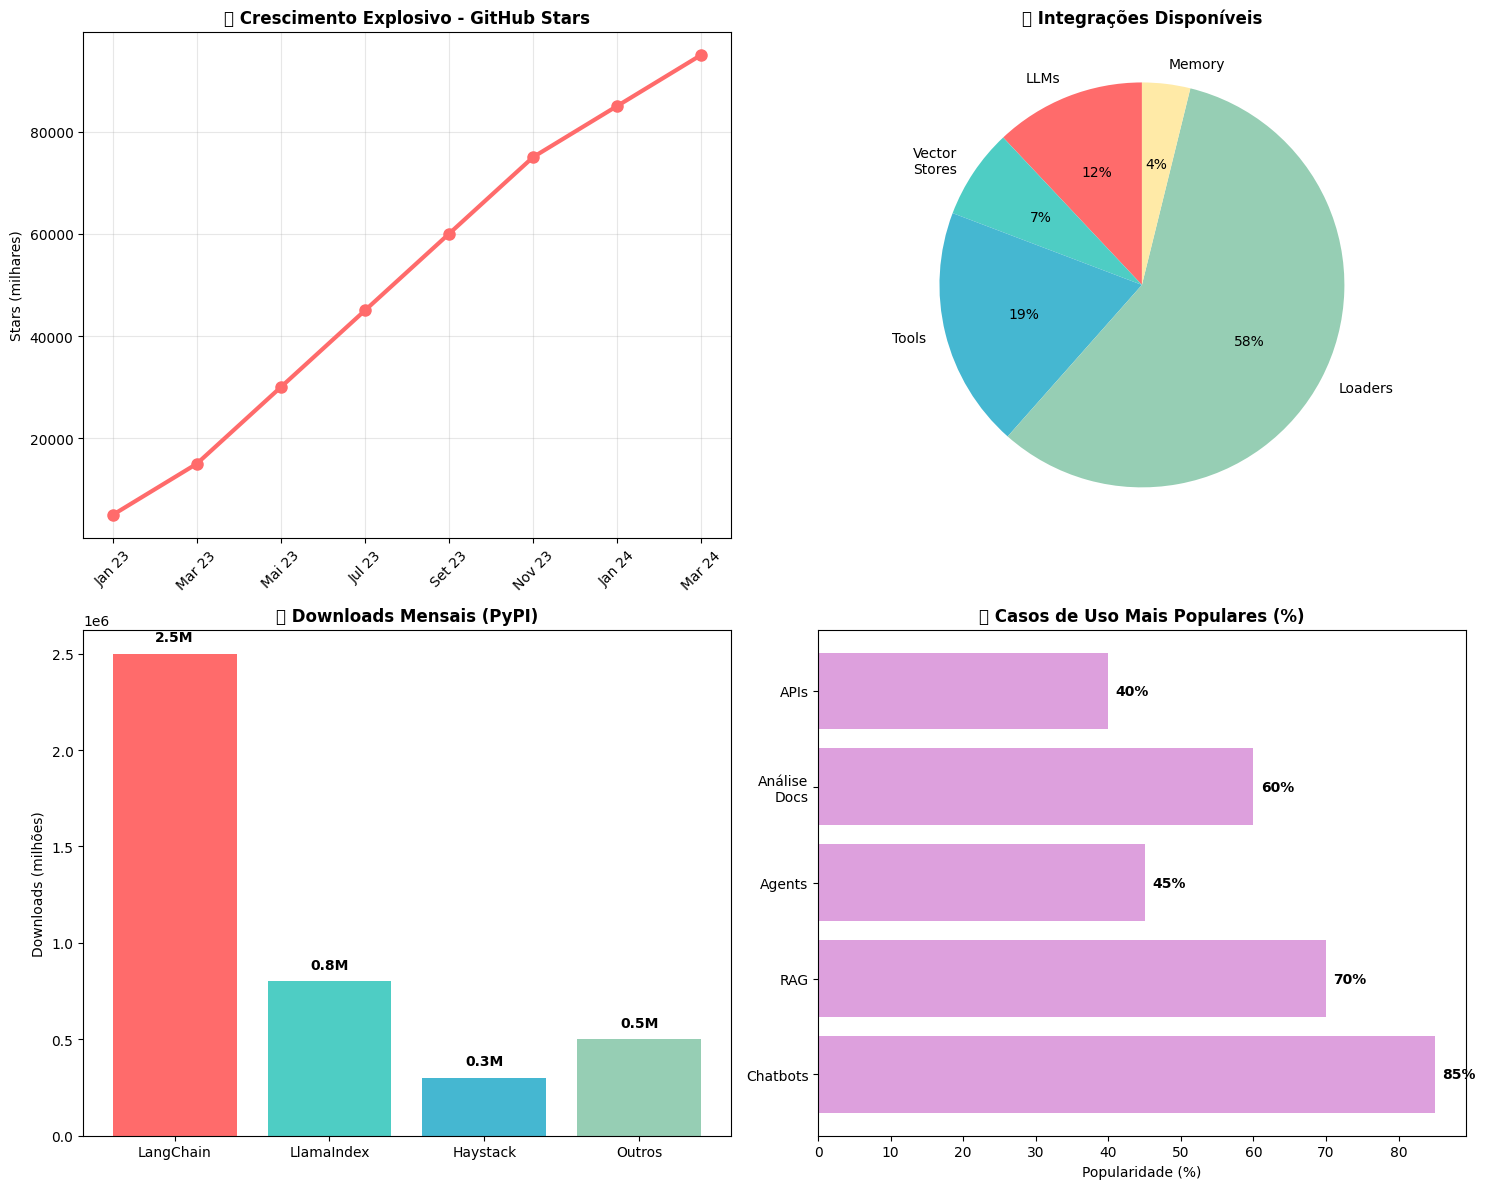

📊 Os números não mentem: LangChain é O framework do momento!
🚀 E você vai dominar ele completamente neste curso!


In [6]:
# Vamos ver algumas estatísticas interessantes sobre o LangChain
import matplotlib.pyplot as plt
import numpy as np

# Dados do ecossistema LangChain (simulados mas baseados em dados reais)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Crescimento do GitHub Stars
meses = ['Jan 23', 'Mar 23', 'Mai 23', 'Jul 23', 'Set 23', 'Nov 23', 'Jan 24', 'Mar 24']
stars = [5000, 15000, 30000, 45000, 60000, 75000, 85000, 95000]

ax1.plot(meses, stars, marker='o', linewidth=3, markersize=8, color='#FF6B6B')
ax1.set_title('📈 Crescimento Explosivo - GitHub Stars', fontweight='bold', fontsize=12)
ax1.set_ylabel('Stars (milhares)')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Integrações disponíveis
categorias = ['LLMs', 'Vector\nStores', 'Tools', 'Loaders', 'Memory']
quantidade = [25, 15, 40, 120, 8]
cores_pizza = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

ax2.pie(quantidade, labels=categorias, autopct='%1.0f%%',
        colors=cores_pizza, startangle=90)
ax2.set_title('🔌 Integrações Disponíveis', fontweight='bold', fontsize=12)

# 3. Comparação de downloads
frameworks = ['LangChain', 'LlamaIndex', 'Haystack', 'Outros']
downloads_mensais = [2500000, 800000, 300000, 500000]  # em milhares

bars = ax3.bar(frameworks, downloads_mensais,
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
ax3.set_title('📦 Downloads Mensais (PyPI)', fontweight='bold', fontsize=12)
ax3.set_ylabel('Downloads (milhões)')

# Adicionando valores nas barras
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 50000,
            f'{height/1000000:.1f}M', ha='center', va='bottom', fontweight='bold')

# 4. Casos de uso mais populares
casos_uso = ['Chatbots', 'RAG', 'Agents', 'Análise\nDocs', 'APIs']
popularidade = [85, 70, 45, 60, 40]

ax4.barh(casos_uso, popularidade, color='#DDA0DD')
ax4.set_title('🎯 Casos de Uso Mais Populares (%)', fontweight='bold', fontsize=12)
ax4.set_xlabel('Popularidade (%)')

# Adicionando valores
for i, v in enumerate(popularidade):
    ax4.text(v + 1, i, f'{v}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 Os números não mentem: LangChain é O framework do momento!")
print("🚀 E você vai dominar ele completamente neste curso!")

## 💡 Seu Primeiro "Olá Mundo" com LangChain

Chega de teoria! Vamos colocar a mão na massa com um exemplo super simples.

**Importante**: Para o próximo código funcionar, você precisa ter uma chave da API do Google (Gemini). Não se preocupe, no próximo módulo vamos ver isso em detalhes!

Por enquanto, vamos simular como seria:

In [7]:
# Simulando nosso primeiro contato com LangChain
# (No próximo módulo vamos fazer isso de verdade!)

print("🤖 Simulando uma conversa com IA usando LangChain:")
print("="*50)

# Simulando o código que vamos usar
codigo_exemplo = '''
# ============================================================
# VERSÃO 0.3 (código antigo - mantido como referência):
# from langchain_google_genai import ChatGoogleGenerativeAI
# from langchain.schema import HumanMessage
#
# chat = ChatGoogleGenerativeAI(
#     model="gemini-2.0-flash",
#     google_api_key="sua_chave_aqui"
# )
# mensagem = HumanMessage(content="Explique o que é LangChain em 50 palavras")
# resposta = chat([mensagem])
# print(resposta.content)
# ============================================================

# VERSÃO 1.0 (código atual):
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.messages import HumanMessage  # Mudou de langchain.schema para langchain.messages

# Conectando com o Gemini (Google)
model = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    google_api_key="sua_chave_aqui"
)

# Fazendo uma pergunta
mensagem = HumanMessage("Explique o que é LangChain em 50 palavras")
resposta = model.invoke([mensagem])  # Mudou de chat([...]) para model.invoke([...])

print(resposta.content)
'''

print("📝 Código que vamos executar:")
print(codigo_exemplo)

# Simulando a resposta
resposta_simulada = """
🤖 Resposta do Gemini:

LangChain é um framework Python que simplifica a criação de aplicações
com modelos de linguagem. Oferece componentes pré-construídos para
chatbots, RAG, agents e workflows complexos. Conecta facilmente
diferentes LLMs, gerencia memória e permite criar pipelines
sofisticados de IA com poucas linhas de código.
"""

print(resposta_simulada)
print("\n✨ Liiindo! Com apenas algumas linhas, já temos IA funcionando!")
print("🎯 No próximo módulo vamos fazer isso DE VERDADE!")

🤖 Simulando uma conversa com IA usando LangChain:
📝 Código que vamos executar:

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.schema import HumanMessage

# Conectando com o Gemini (Google)
chat = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    google_api_key="sua_chave_aqui"
)

# Fazendo uma pergunta
mensagem = HumanMessage(content="Explique o que é LangChain em 50 palavras")
resposta = chat([mensagem])

print(resposta.content)


🤖 Resposta do Gemini:

LangChain é um framework Python que simplifica a criação de aplicações 
com modelos de linguagem. Oferece componentes pré-construídos para 
chatbots, RAG, agents e workflows complexos. Conecta facilmente 
diferentes LLMs, gerencia memória e permite criar pipelines 
sofisticados de IA com poucas linhas de código.


✨ Liiindo! Com apenas algumas linhas, já temos IA funcionando!
🎯 No próximo módulo vamos fazer isso DE VERDADE!


## 🎮 Exercício Prático: Explorando o Ecossistema

Agora é sua vez! Vamos fazer um exercício para fixar o que aprendemos:

## 🎯 Resumo do Módulo 1

Parabéns! Você completou o primeiro módulo do curso! Vamos recapitular o que aprendemos:

### ✅ **O que Você Aprendeu Hoje**

1. **LangChain é um framework** que simplifica DRASTICAMENTE o trabalho com IA
2. **Reduz código em até 80%** comparado com implementações manuais
3. **Tem 6 componentes principais**: Models, Prompts, Chains, Memory, Agents, Tools
4. **É o framework mais usado** no mercado (2.5M downloads/mês)
5. **Nosso roadmap** vai do básico ao avançado em 17 módulos

### 🔮 **O que Vem por Aí**

No **Módulo 2 - ChatModel**, você vai:
- Conectar com o Gemini 2.0 Flash (nossa IA principal)
- Aprender outras opções (GPT, Claude, etc.)
- Fazer sua primeira conversa REAL com IA
- Entender parâmetros como temperatura e tokens

### 💪 **Seu Desafio para Casa**

1. **Pense em um projeto** que você gostaria de criar com IA
2. **Anote os componentes** que você acha que vai precisar
3. **Crie uma conta no Google AI Studio** (vamos precisar no próximo módulo)

### 🎉 **Parabéns!**

Você deu o primeiro passo numa jornada incrível! O LangChain vai abrir um mundo de possibilidades para você.

**Dica!** Salve este notebook e volte aqui sempre que precisar relembrar os conceitos básicos!

---

**Nos vemos no Módulo 2! Bora conectar com IA de verdade! 🚀**

/tmp/ipython-input-3453324228.py:38: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


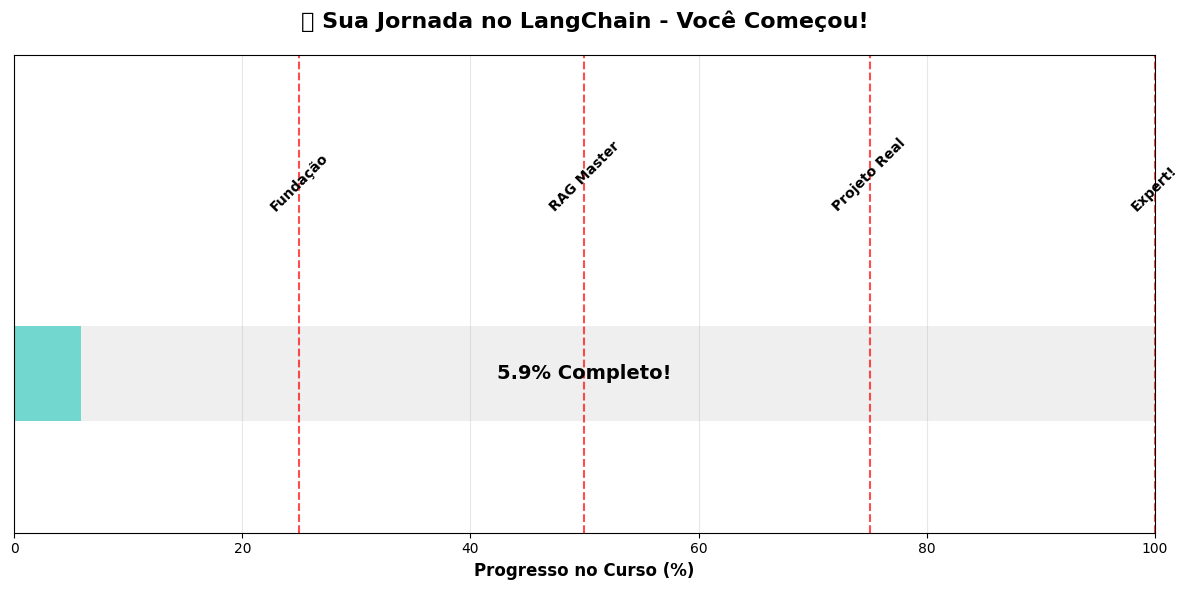

🎉 PARABÉNS! Você completou o Módulo 1!
📊 Progresso: 5.9% do curso total
🎯 Faltam apenas 16 módulos para você virar expert!

🚀 Próximo stop: Módulo 2 - ChatModel
💪 Você está no caminho certo para dominar o LangChain!

👋 Até o próximo módulo! Bora que bora!


In [10]:
# Celebrando a conclusão do Módulo 1!
import matplotlib.pyplot as plt
import numpy as np

# Criando um gráfico de progresso motivacional
fig, ax = plt.subplots(figsize=(12, 6))

# Dados do progresso
modulos_total = 17
modulo_atual = 1
progresso = (modulo_atual / modulos_total) * 100

# Barra de progresso
ax.barh(0, progresso, height=0.3, color='#4ECDC4', alpha=0.8)
ax.barh(0, 100-progresso, height=0.3, left=progresso, color='#E0E0E0', alpha=0.5)

# Adicionando texto
ax.text(50, 0, f'{progresso:.1f}% Completo!',
        ha='center', va='center', fontsize=14, weight='bold')

# Marcos importantes
marcos = [25, 50, 75, 100]
labels_marcos = ['Fundação', 'RAG Master', 'Projeto Real', 'Expert!']

for marco, label in zip(marcos, labels_marcos):
    ax.axvline(marco, color='red', linestyle='--', alpha=0.7)
    ax.text(marco, 0.5, label, ha='center', va='bottom',
           fontsize=10, weight='bold', rotation=45)

ax.set_xlim(0, 100)
ax.set_ylim(-0.5, 1)
ax.set_xlabel('Progresso no Curso (%)', fontsize=12, weight='bold')
ax.set_title('🎯 Sua Jornada no LangChain - Você Começou!',
             fontsize=16, weight='bold', pad=20)
ax.set_yticks([])
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("🎉 PARABÉNS! Você completou o Módulo 1!")
print(f"📊 Progresso: {progresso:.1f}% do curso total")
print(f"🎯 Faltam apenas {modulos_total - modulo_atual} módulos para você virar expert!")
print("\n🚀 Próximo stop: Módulo 2 - ChatModel")
print("💪 Você está no caminho certo para dominar o LangChain!")
print("\n" + "="*50)
print("👋 Até o próximo módulo! Bora que bora!")